### **DIABETE**

### **LIBRERIE & IMPORT**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
# Funzione che serve ad effettuare la divisione tra train set e test set
from sklearn.model_selection import train_test_split
# Metriche per definire la qualità del modello generato
from sklearn.metrics import accuracy_score, mean_squared_error
# Per Scaling dei dati
from sklearn.preprocessing import StandardScaler

### **DATAFRAME DIABETE**

In [2]:
diabetes = load_diabetes()

df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes["target"] = diabetes.target

display(df_diabetes.head())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### **VISUALIZZAZIONE DATI**

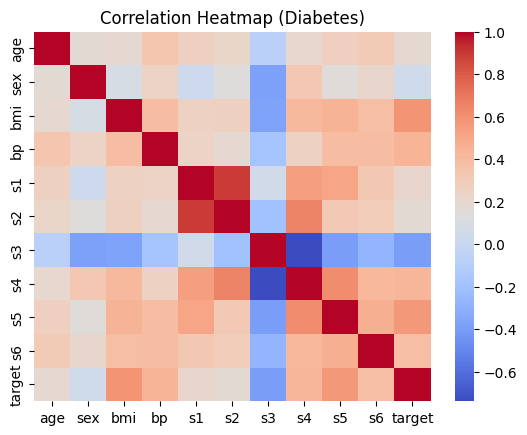

In [3]:
sns.heatmap(df_diabetes.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap (Diabetes)")
plt.show()

RANDOM_SEED = 42

X = df_diabetes.drop("target", axis=1)
y = df_diabetes["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=RANDOM_SEED)

### **PROCESSING DEI DATI - SCALING**

In [4]:
# Normalizzo i dati applicando lo scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

[ 0.00112747  0.00039712  0.00289441  0.00125595  0.00155699  0.00105906
 -0.00056159  0.00152299  0.00192075  0.00307781] 

[0.04623185 0.04758869 0.04797741 0.04792614 0.04796267 0.04786383
 0.04736624 0.04847818 0.04789429 0.04793503] 



Text(0.5, 1.0, 'Scaled - Age (Train)')

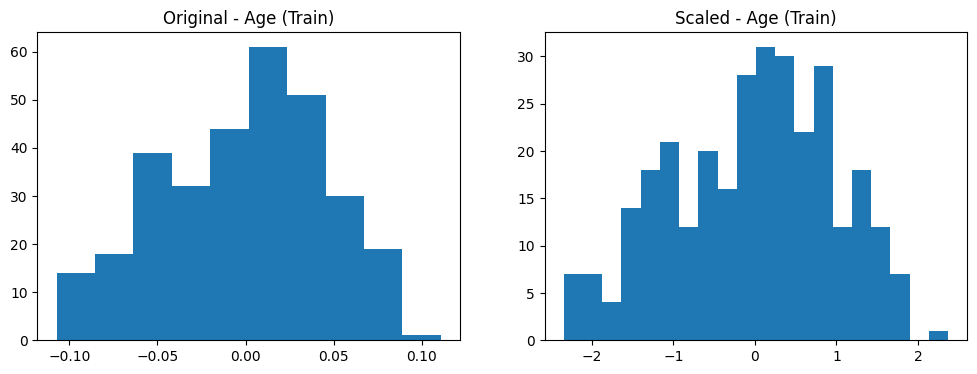

In [5]:
print(scaler.mean_,"\n")   # Media di ogni feature
print(scaler.scale_,"\n")  # Deviazione standard di ogni feature

plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.hist(X_train["age"])
plt.title("Original - Age (Train)")

plt.subplot(1,2,2)
plt.hist(X_train_scaled[:,0], bins=20)
plt.title("Scaled - Age (Train)")

### **ACCURACY**